In [203]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

In [204]:
df = pd.read_csv("/content/nifty50 data.csv")
data = df

In [205]:
df.dropna(inplace = True)

In [206]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,10895.799805,10895.799805,10782.599609,10862.599609,506600.0
1,10815.400391,11018.549805,10813.799805,10948.250000,517900.0
2,10958.099609,10975.650391,10835.900391,10855.500000,548500.0
3,10899.200195,11058.049805,10842.950195,11032.450195,482500.0
4,11087.900391,11181.450195,11062.799805,11109.650391,538100.0


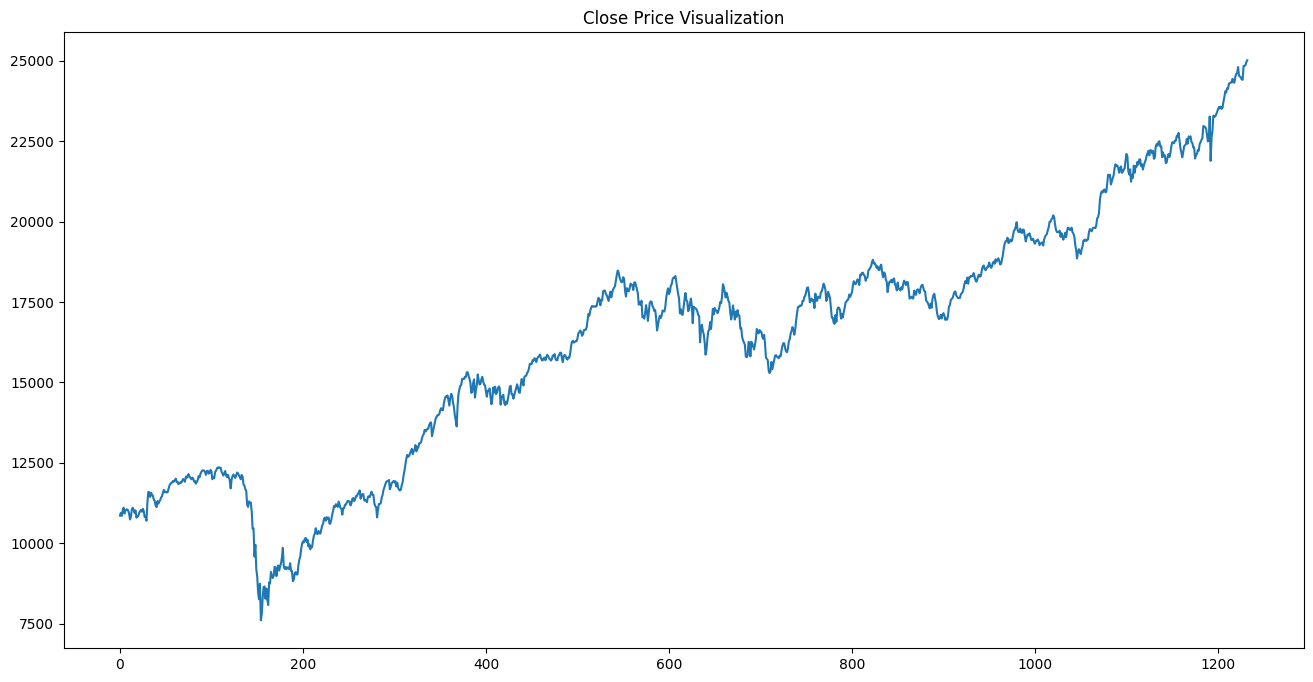

In [207]:
plt.figure(figsize = (16,8))
plt.title("Close Price Visualization")
plt.plot(df.Close)

In [208]:
moving_100 = df['Close'].rolling(100).mean()

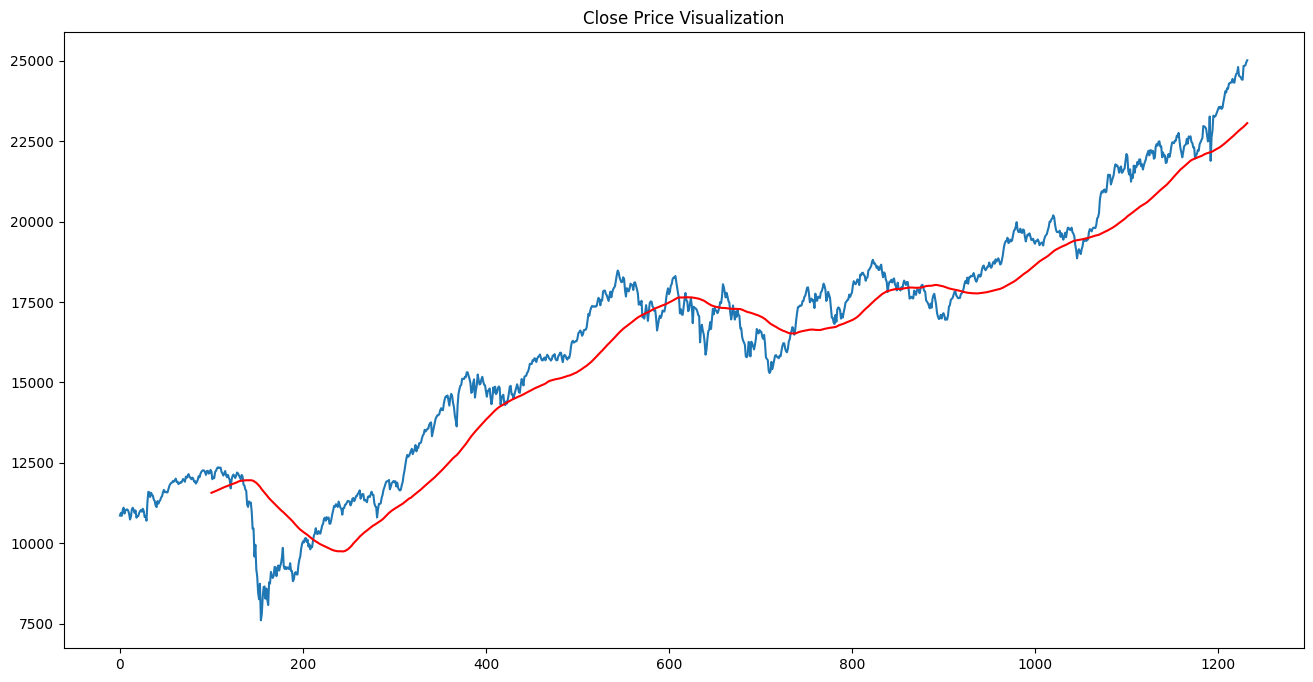

In [209]:
plt.figure(figsize = (16,8))
plt.title("Close Price Visualization")
plt.plot(df['Close'])
plt.plot(moving_100, 'r')

In [210]:
train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(861, 7)
(370, 7)


In [211]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [212]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [213]:
data_training_array = scaler.fit_transform(train_close)
data_test_array = scaler.transform(test_close)

In [214]:
x_train = []
y_train = []

In [215]:
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [216]:
x_test = []
y_test = []
for i in range(100, data_test_array.shape[0]):
    x_test.append(data_test_array[i-100: i])
    y_test.append(data_test_array[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [217]:
x_train.shape

(761, 100, 1)

In [218]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [219]:
print("NaN in train_scaled:", np.isnan(x_train).sum())
print("Infinite in train_scaled:", np.isinf(x_train).sum())
print("NaN in test_scaled:", np.isnan(x_test).sum())
print("Infinite in test_scaled:", np.isinf(x_test).sum())

NaN in train_scaled: 0
Infinite in train_scaled: 0
NaN in test_scaled: 0
Infinite in test_scaled: 0


In [220]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 50)

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 19s 389ms/step - MAE: 0.4645 - loss: 0.2979 - val_MAE: 0.7097 - val_loss: 0.5148
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - MAE: 0.2145 - loss: 0.0650 - val_MAE: 0.3260 - val_loss: 0.1107
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - MAE: 0.1318 - loss: 0.0260 - val_MAE: 0.1226 - val_loss: 0.0168
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - MAE: 0.1136 - loss: 0.0196 - val_MAE: 0.0518 - val_loss: 0.0045
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - MAE: 0.0982 - loss: 0.0160 - val_MAE: 0.1137 - val_loss: 0.0149
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - MAE: 0.0967 - loss: 0.0154 - val_MAE: 0.1563 - val_loss: 0.0262
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - MAE: 0.0985 - loss: 0.0147 - val_MAE: 0.0717 - val_loss: 0.0070
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - MAE: 0.0926 - loss: 0.0143 - val_MAE: 0.1025 - val_loss: 0.0123
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - MAE: 0.08

In [221]:
import tensorflow as tf
tf.keras.models.save_model(model, 'my_model.keras')

In [222]:
past_100_days = pd.DataFrame(train_close[-100:])

In [223]:
test_df = pd.DataFrame(test_close)

In [224]:
import pandas as pd
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [225]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.10346903],
       [0.10222389],
       [0.09841577],
       [0.1196966 ],
       [0.12391977],
       [0.13649178],
       [0.15281113],
       [0.14471857],
       [0.12929654],
       [0.08699711],
       [0.09815329],
       [0.12183262],
       [0.10988306],
       [0.09907493],
       [0.06215823],
       [0.02419211],
       [0.02310575],
       [0.00494336],
       [0.        ],
       [0.03371863],
       [0.00845254],
       [0.05568318],
       [0.06270153],
       [0.06060818],
       [0.05161854],
       [0.0201947 ],
       [0.03728884],
       [0.02395396],
       [0.04486861],
       [0.06026037],
       [0.0816387 ],
       [0.08472687],
       [0.0910372 ],
       [0.09254481],
       [0.11139663],
       [0.10231544],
       [0.1121533 ],
       [0.1182381 ],
       [0.14574987],
       [0.16200818],
       [0.15437334],
       [0.15069323],
       [0.15856004],
       [0.16901438],
       [0.16342401],
       [0.1477028 ],
       [0.18694457],
       [0.184

In [226]:
y_pred = model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step


In [227]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

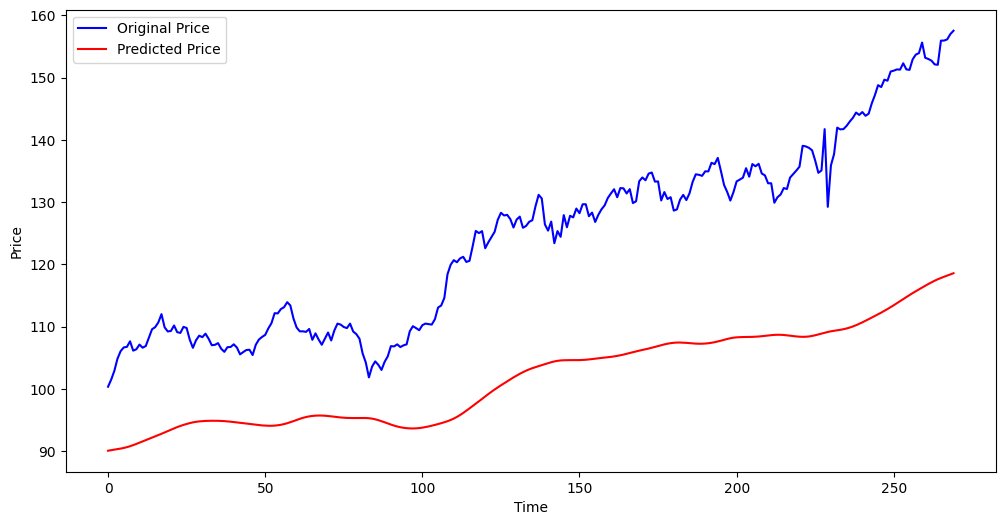

In [228]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [229]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  22.31537438194324
